In [1]:
import os
import re
import pandas as pd
from glob import glob

In [13]:
FILE_NAMES = glob("../outs/expt7-*")
print(FILE_NAMES)
FILE_NAMES

['../outs/expt7-vdist2vec-Ahmedabad-8346247.out', '../outs/expt7-vdist2vec-Dongguan-8346186.out', '../outs/expt7-geodnn-Ahmedabad-8346252.out', '../outs/expt7-rgcndist2vec-Surat-8346182.out', '../outs/expt7-rgcndist2vec-Ahmedabad-8346279.out', '../outs/expt7-ndist2vec-Harbin-8346210.out', '../outs/expt7-rgcndist2vec-Dongguan-8346190.out', '../outs/expt7-rgcndist2vec-Harbin-8346226.out', '../outs/expt7-rsagedist2vec-Dongguan-8346200.out', '../outs/expt7-rgatdist2vec-Ahmedabad-8346297.out', '../outs/expt7-ndist2vec-Surat-8346181.out', '../outs/expt7-vdist2vec-Harbin-8346208.out', '../outs/expt7-rsagedist2vec-Harbin-8346227.out', '../outs/expt7-ndist2vec-Ahmedabad-8346270.out', '../outs/expt7-rsagedist2vec-Ahmedabad-8346284.out', '../outs/expt7-vdist2vec-Surat-8346179.out', '../outs/expt7-geodnn-Surat-8346180.out', '../outs/expt7-rgatdist2vec-Surat-8346185.out', '../outs/expt7-rgatdist2vec-Harbin-8346237.out', '../outs/expt7-rsagedist2vec-Surat-8346184.out', '../outs/expt7-ndist2vec-Dongg

['../outs/expt7-vdist2vec-Ahmedabad-8346247.out',
 '../outs/expt7-vdist2vec-Dongguan-8346186.out',
 '../outs/expt7-geodnn-Ahmedabad-8346252.out',
 '../outs/expt7-rgcndist2vec-Surat-8346182.out',
 '../outs/expt7-rgcndist2vec-Ahmedabad-8346279.out',
 '../outs/expt7-ndist2vec-Harbin-8346210.out',
 '../outs/expt7-rgcndist2vec-Dongguan-8346190.out',
 '../outs/expt7-rgcndist2vec-Harbin-8346226.out',
 '../outs/expt7-rsagedist2vec-Dongguan-8346200.out',
 '../outs/expt7-rgatdist2vec-Ahmedabad-8346297.out',
 '../outs/expt7-ndist2vec-Surat-8346181.out',
 '../outs/expt7-vdist2vec-Harbin-8346208.out',
 '../outs/expt7-rsagedist2vec-Harbin-8346227.out',
 '../outs/expt7-ndist2vec-Ahmedabad-8346270.out',
 '../outs/expt7-rsagedist2vec-Ahmedabad-8346284.out',
 '../outs/expt7-vdist2vec-Surat-8346179.out',
 '../outs/expt7-geodnn-Surat-8346180.out',
 '../outs/expt7-rgatdist2vec-Surat-8346185.out',
 '../outs/expt7-rgatdist2vec-Harbin-8346237.out',
 '../outs/expt7-rsagedist2vec-Surat-8346184.out',
 '../outs/e

In [ ]:
## Example output:
# Running command: python model-geodnn.py --data_name Surat
# /scratch/gilbreth/gchoudha/shortest-distance/src/data_utils.py:266: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
#   dataset = torch.load(file_name)
# Arguments:
#   - data_name: Surat
#   - data_strategy: landmark
#   - batch_size: 1024
#   - learning_rate: 0.001

results = []

def parse_file(file_name):
    # filename = "expt6-geodnn-Surat-1234567.out"
    job_id = file_name.split("-")[-1].split(".")[0]
    python_command = None
    data_name = None
    model_name = None
    data_strategy = None
    data_size = None
    data_distance_mean = None
    num_nodes = None
    num_edges = None
    model_params = None
    mae = None
    mre = None
    loss_function = None
    gpu_name = None
    device = None
    precomputation_time = None
    evaluation_time = None
    query_time = None
    memory_used = None
    time_elapsed = None

    print(file_name)
    with open(file_name, 'r') as file:
        lines = file.readlines()
        for line in lines:
            if python_command is None and line.startswith("Running command: python "):
                python_command = line.split("Running command: ")[1].strip()
                print(f"python_command: {python_command}")

            if data_name is None and line.startswith("  - data_name: "):
                data_name = line.split("  - data_name: ")[1].strip()
                print(f"data_name: {data_name}")

            if data_strategy is None and line.startswith("  - data_strategy: "):
                data_strategy = line.split("  - data_strategy: ")[1].strip()
                print(f"data_strategy: {data_strategy}")

            if num_nodes is None and line.startswith("  - No. of nodes: "):
                num_nodes = line.split("  - No. of nodes: ")[1].strip()
                print(f"num_nodes: {num_nodes}")

            if num_edges is None and line.startswith("  - No. of edges: "):
                num_edges = line.split("  - No. of edges: ")[1].strip()
                print(f"num_edges: {num_edges}")

            if data_size is None and line.startswith("  - No. of samples: "):
                data_size = line.split("  - No. of samples: ")[1].strip()
                print(f"data_size: {data_size}")

            # Mean/Std distance: 8036.82/5622.68
            if data_distance_mean is None and line.startswith("  - Mean/Std distance: "):
                data_distance_mean = line.split("  - Mean/Std distance: ")[1].strip()
                data_distance_mean = data_distance_mean.split("/")[0].strip()
                print(f"data_distance_mean: {data_distance_mean}")

            # OptimizedModule(
            #     (_orig_mod): GeoDNN(
            if model_name is None and "(_orig_mod): " in line:
                model_name = line.split("(_orig_mod): ")[1].strip()[:-1]
                print(f"model_name: {model_name}")

            if model_params is None and line.startswith("Model parameters size: "):
                model_params = line.split("Model parameters size: ")[1].strip()
                print(f"model_params: {model_params}")

            if loss_function is None and line.startswith("Loss function: "):
                loss_function = line.split("Loss function: ")[1].strip()
                print(f"loss_function: {loss_function}")

            if gpu_name is None and line.startswith("GPU Detected: "):
                gpu_name = line.split("GPU Detected: ")[1].strip()
                print(f"gpu_name: {gpu_name}")

            if device is None and line.startswith("Using Device: "):
                device = line.split("Using Device: ")[1].strip()
                print(f"device: {device}")

            # Optimization Finished! (0.92 minutes)
            if precomputation_time is None and line.startswith("Optimization Finished! "):
                precomputation_time = line.split("Optimization Finished! ")[1].strip()
                print(f"precomputation_time: {precomputation_time}")

            # Evaluation Finished! (2.37 seconds)
            if evaluation_time is None and line.startswith("Evaluation Finished! "):
                evaluation_time = line.split("Evaluation Finished! ")[1].strip()
                print(f"evaluation_time: {evaluation_time}")

            # Query time per sample: 3.04 microseconds
            if query_time is None and line.startswith("Query time per sample: "):
                query_time = line.split("Query time per sample: ")[1].strip()
                print(f"query_time: {query_time}")

            # Mean Absolute Error: 252.68
            if line.startswith("Mean Absolute Error: "):
                mae = line.split("Mean Absolute Error: ")[1].strip()
                print(f"mae: {mae}")

            # Mean Relative Error: 7.14%
            if line.startswith("Mean Relative Error: "):
                mre = line.split("Mean Relative Error: ")[1].strip()
                print(f"mre: {mre}")

            # Max CPU Memory: 1214500 KB
            if memory_used is None and line.startswith("Max CPU Memory: "):
                memory_used = line.split("Max CPU Memory: ")[1].strip()
                print(f"memory_used: {memory_used}")

            # Time Elapsed: 1:05.67 sec
            if time_elapsed is None and line.startswith("Time Elapsed: "):
                time_elapsed = line.split("Time Elapsed: ")[1].strip()
                print(f"time_elapsed: {time_elapsed}")

    # Convert the parsed data into a dictionary
    return {
        "job_id": job_id,
        "python_command": python_command,
        "data_name": data_name,
        "model_name": model_name,
        "data_strategy": data_strategy,
        "data_size": data_size,
        "data_distance_mean": data_distance_mean,
        "num_nodes": num_nodes,
        "num_edges": num_edges,
        "model_params": model_params,
        "mae": mae,
        "mre": mre,
        "loss_function": loss_function,
        "gpu_name": gpu_name,
        "device": device,
        "precomputation_time": precomputation_time,
        "evaluation_time": evaluation_time,
        "query_time": query_time,
        "memory_used": memory_used,
        "time_elapsed": time_elapsed
    }

for file_name in FILE_NAMES[:]:
    result = parse_file(file_name)
    results.append(result)

# Convert the list of dictionaries into a DataFrame
df = pd.DataFrame(results)

../outs/expt7-vdist2vec-Ahmedabad-8346247.out
python_command: python model-vdist2vec.py --data_name Ahmedabad
data_name: Ahmedabad
data_strategy: landmark
num_nodes: 9706
num_edges: 15040
data_size: 18837405
data_distance_mean: 16992.86
model_name: Vdist2vec
model_params: 1923905
loss_function: MSELoss()
gpu_name: NVIDIA A30
device: cuda
precomputation_time: (25.60 minutes)
evaluation_time: (58.13 seconds)
mae: 92.51
mre: 2.83%
query_time: 3.09 microseconds
memory_used: 4933456 KB
time_elapsed: 27:26.79 sec
../outs/expt7-vdist2vec-Dongguan-8346186.out
python_command: python model-vdist2vec.py --data_name Dongguan
data_name: Dongguan
data_strategy: landmark
num_nodes: 4973
num_edges: 7825
data_size: 4942168
data_distance_mean: 34620.16
model_name: Vdist2vec
model_params: 514268
loss_function: MSELoss()
gpu_name: NVIDIA A30
device: cuda
precomputation_time: (4.85 minutes)
evaluation_time: (11.89 seconds)
mae: 299.44
mre: 5.06%
query_time: 2.41 microseconds
memory_used: 2097536 KB
time_el

In [125]:
df.head()

,job_id,python_command,data_name,model_name,data_strategy,data_size,data_distance_mean,num_nodes,num_edges,model_params,mae,mre,loss_function,gpu_name,device,precomputation_time,evaluation_time,query_time,memory_used,time_elapsed
0,8346247,python model-vdist2vec.py --data_name Ahmedabad,Ahmedabad,Vdist2vec,landmark,18837405,16992.86,9706,15040,1923905,92.51,2.83%,MSELoss(),NVIDIA A30,cuda,(25.60 minutes),(58.13 seconds),3.09 microseconds,4933456 KB,27:26.79 sec
1,8346186,python model-vdist2vec.py --data_name Dongguan,Dongguan,Vdist2vec,landmark,4942168,34620.16,4973,7825,514268,299.44,5.06%,MSELoss(),NVIDIA A30,cuda,(4.85 minutes),(11.89 seconds),2.41 microseconds,2097536 KB,5:18.60 sec
2,8346252,python model-geodnn.py --data_name Ahmedabad,Ahmedabad,GeoDNN,landmark,18837405,16992.86,9706,15040,4241,302.64,5.26%,MSELoss(),NVIDIA A30,cuda,(19.63 minutes),(47.08 seconds),2.50 microseconds,4905220 KB,21:03.88 sec
3,8346182,python model-rgcndist2vec.py --data_name Surat,Surat,RGCNdist2vec,landmark,780520,8036.82,1977,3054,17952,380.30,9.95%,SmoothL1Loss(),NVIDIA A30,cuda,(1.30 minutes),(2.64 seconds),3.38 microseconds,1381184 KB,1:33.23 sec
4,8346279,python model-rgcndist2vec.py --data_name Ahmed...,Ahmedabad,RGCNdist2vec,landmark,18837405,16992.86,9706,15040,17952,647.80,11.16%,SmoothL1Loss(),NVIDIA A30,cuda,(25.51 minutes),(54.95 seconds),2.92 microseconds,5087080 KB,27:12.30 sec


In [126]:
# 12345
df['model_params'] = df['model_params'].astype(int)/1000
# 2.83%
df['mre'] = df['mre'].str.extract(r'(\d+\.\d+)').astype(float)
# (25.60 minutes)
df['precomputation_time'] = df['precomputation_time'].str.extract(r'(\d+\.\d+)').astype(float)
# (58.13 seconds)
df['evaluation_time'] = df['evaluation_time'].str.extract(r'(\d+\.\d+)').astype(float)
# 3.09 microseconds
df['query_time'] = df['query_time'].str.extract(r'(\d+\.\d+)').astype(float)
# 208403 KB
df['memory_used'] = df['memory_used'].str.extract(r'(\d+)').astype(float) / 1024 / 1024
# 27:29.79 sec
df['time_elapsed'] = df['time_elapsed'].str.extract(r'(\d+):\d+\.\d+').astype(int)
df.head()

,job_id,python_command,data_name,model_name,data_strategy,data_size,data_distance_mean,num_nodes,num_edges,model_params,mae,mre,loss_function,gpu_name,device,precomputation_time,evaluation_time,query_time,memory_used,time_elapsed
0,8346247,python model-vdist2vec.py --data_name Ahmedabad,Ahmedabad,Vdist2vec,landmark,18837405,16992.86,9706,15040,1923.905,92.51,2.83,MSELoss(),NVIDIA A30,cuda,25.60,58.13,3.09,4.704910,27
1,8346186,python model-vdist2vec.py --data_name Dongguan,Dongguan,Vdist2vec,landmark,4942168,34620.16,4973,7825,514.268,299.44,5.06,MSELoss(),NVIDIA A30,cuda,4.85,11.89,2.41,2.000366,5
2,8346252,python model-geodnn.py --data_name Ahmedabad,Ahmedabad,GeoDNN,landmark,18837405,16992.86,9706,15040,4.241,302.64,5.26,MSELoss(),NVIDIA A30,cuda,19.63,47.08,2.50,4.677982,21
3,8346182,python model-rgcndist2vec.py --data_name Surat,Surat,RGCNdist2vec,landmark,780520,8036.82,1977,3054,17.952,380.30,9.95,SmoothL1Loss(),NVIDIA A30,cuda,1.30,2.64,3.38,1.317200,1
4,8346279,python model-rgcndist2vec.py --data_name Ahmed...,Ahmedabad,RGCNdist2vec,landmark,18837405,16992.86,9706,15040,17.952,647.80,11.16,SmoothL1Loss(),NVIDIA A30,cuda,25.51,54.95,2.92,4.851418,27


In [127]:
# Define order for models and datasets
model_name_order = [
    'GeoDNN',
    'Vdist2vec',
    'Ndist2vec',
    'RGCNdist2vec',
    'RSAGEdist2vec',
    'RGATdist2vec'
]
data_name_order = [
    'Surat',
    'Dongguan',
    'Harbin',
    'Ahmedabad'
]
swap_levels = False

In [130]:
df[['data_name', 'num_nodes', 'num_edges', 'data_size', 'data_distance_mean']].drop_duplicates().T

,0,1,3,5
data_name,Ahmedabad,Dongguan,Surat,Harbin
num_nodes,9706,4973,1977,6772
num_edges,15040,7825,3054,10776
data_size,18837405,4942168,780520,9167934
data_distance_mean,16992.86,34620.16,8036.82,62726.45


In [ ]:
# Pivot the DataFrame
values_order = ['model_params']
pivot_table = df.pivot(
    index='model_name',
    columns='data_name',
    values=values_order
)
if swap_levels:
    # Swap the levels of the columns
    pivot_table = pivot_table.swaplevel(0, 1, axis='columns')
    # cross-product the values with the data names
    column_order = [(data_name, value) for value in values_order for data_name in data_name_order]
else:
    # cross-product the values with the data names
    column_order = [(value, data_name) for data_name in data_name_order for value in values_order]
pivot_table.loc[model_name_order, column_order].round(2)

model_params                           
data_name            Surat Dongguan  Harbin Ahmedabad
model_name                                           
GeoDNN                4.24     4.24    4.24      4.24
Vdist2vec            87.04   514.27  943.36   1923.90
Ndist2vec           147.42   297.22  387.17    533.87
RGCNdist2vec         17.95    17.95   17.95     17.95
RSAGEdist2vec        35.36    35.36   35.36     35.36
RGATdist2vec         19.04    19.04   19.04     19.04

In [ ]:
# Pivot the DataFrame
values_order = ['mae', 'mre']
pivot_table = df.pivot(
    index='model_name',
    columns='data_name',
    values=values_order
)
# cross-product the values with the data names
column_order = [(value, data_name) for value in values_order for data_name in data_name_order]
pivot_table.loc[model_name_order, column_order].round(2)

mae                                mre                  \
data_name       Surat  Dongguan   Harbin Ahmedabad Surat Dongguan Harbin   
model_name                                                                 
GeoDNN         241.61    790.70  2049.31    302.64  7.06     6.16  11.92   
Vdist2vec      129.36    299.44   403.68     92.51   5.5     5.06   6.48   
Ndist2vec       93.04  11758.27  7466.18    698.68   4.0    60.96   9.53   
RGCNdist2vec   380.30   1246.89  2472.39    647.80  9.95    10.98  20.89   
RSAGEdist2vec  213.36    526.32   849.73    189.24  4.57      3.6   5.71   
RGATdist2vec   225.25    657.82   825.84    214.25   4.6     3.55    4.7   

                         
data_name     Ahmedabad  
model_name               
GeoDNN             5.26  
Vdist2vec          2.83  
Ndist2vec          2.47  
RGCNdist2vec      11.16  
RSAGEdist2vec      2.78  
RGATdist2vec       2.84

In [ ]:
# Pivot the DataFrame
values_order = ['precomputation_time', 'query_time']
pivot_table = df.pivot(
    index='model_name',
    columns='data_name',
    values=values_order
)
# cross-product the values with the data names
column_order = [(value, data_name) for value in values_order for data_name in data_name_order]
pivot_table.loc[model_name_order, column_order].round(2)

precomputation_time                           query_time  \
data_name                   Surat Dongguan Harbin Ahmedabad      Surat   
model_name                                                               
GeoDNN                       1.05     6.71   9.74     19.63       3.11   
Vdist2vec                    0.77     4.85   9.55     25.60       2.37   
Ndist2vec                    1.31     8.91  22.47     33.69       2.73   
RGCNdist2vec                 1.30     8.43  12.33     25.51       3.38   
RSAGEdist2vec                1.03     6.95  11.57     27.83       2.77   
RGATdist2vec                 1.93    14.54  18.16     38.21       4.21   

                                         
data_name     Dongguan Harbin Ahmedabad  
model_name                               
GeoDNN            2.85   2.45      2.50  
Vdist2vec         2.41   2.36      3.09  
Ndist2vec         2.76   3.50      2.86  
RGCNdist2vec      3.44   2.94      2.92  
RSAGEdist2vec     3.00   2.90      2.93  
RGATdist2vec      4.55   3.48      3.49

In [ ]:
# Pivot the DataFrame
values_order = ['memory_used', 'time_elapsed']
pivot_table = df.pivot(
    index='model_name',
    columns='data_name',
    values=values_order
)
# cross-product the values with the data names
column_order = [(value, data_name) for value in values_order for data_name in data_name_order]
pivot_table.loc[model_name_order, column_order].round(2)

memory_used                           time_elapsed           \
data_name           Surat Dongguan Harbin Ahmedabad        Surat Dongguan   
model_name                                                                  
GeoDNN               1.16     1.99   2.80      4.68          1.0      7.0   
Vdist2vec            1.17     2.00   2.81      4.70          0.0      5.0   
Ndist2vec            1.19     2.04   2.84      4.73          1.0      9.0   
RGCNdist2vec         1.32     2.15   2.96      4.85          1.0      9.0   
RSAGEdist2vec        1.31     2.14   2.95      4.85          1.0      7.0   
RGATdist2vec         1.33     2.16   2.97      4.85          2.0     15.0   

                                
data_name     Harbin Ahmedabad  
model_name                      
GeoDNN          10.0      21.0  
Vdist2vec       10.0      27.0  
Ndist2vec       23.0      35.0  
RGCNdist2vec    13.0      27.0  
RSAGEdist2vec   12.0      29.0  
RGATdist2vec    19.0      40.0

## Dataset Summary

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

datasets = pd.read_csv("../data/processed/full_dataset_summary.csv")
datasets.head(30)

,Dataset Name,Nodes,Edges,Min Degree,Max Degree,Avg Degree,BFS Time (s),Min Distance (m),Max Distance (m),Avg Distance (m)
0,Surat,1843,2926,2,6,3.175258,0.000024,0,36081.453724,7461.030287
1,Quanzhou,3079,5150,2,6,3.345242,0.000002,0,196633.280532,34451.294986
2,Dongguan,4606,7490,2,7,3.252280,0.000005,0,89695.522636,34169.412945
3,Zhengzhou,5530,9223,2,8,3.335624,0.000008,0,145025.634691,33597.673231
4,Fuzhou,5955,9693,2,8,3.255416,0.000002,0,184879.842392,36192.721536
5,Harbin,6328,10381,2,7,3.280973,0.000001,0,459221.047861,55336.925324
6,Dalian,7455,12077,2,7,3.239973,0.000002,0,258726.053987,64536.694822
7,Qingdao,7992,13275,2,8,3.322072,0.000002,0,200357.662194,52932.755488
8,Dhaka,8349,13117,2,12,3.142173,0.000001,0,57670.940506,10424.881985
9,Ahmedabad,8808,14178,2,6,3.219346,0.000002,0,105002.158357,16149.780590


In [19]:
# Create logarithmic buckets
def log_bucket(nodes):
    if nodes < 10**3:
        return '<1K'
    elif nodes < 10**4:
        return '1K-10K'
    elif nodes < 10**5:
        return '10K-100K'
    else:
        return '>100K'

datasets['Size Category'] = datasets['Nodes'].apply(log_bucket)

for category in datasets['Size Category'].unique():
    print(f"Category: {category}")
    temp_df = datasets[datasets['Size Category'] == category][['Dataset Name', 'Nodes', 'Edges', 'Max Degree', 'Avg Degree', 'Max Distance (m)']].copy()
    temp_df['Avg Degree'] = temp_df['Avg Degree'].round(2)
    temp_df['Max Distance (m)'] = (temp_df['Max Distance (m)'] / 1000).round().astype(int)
    temp_df['Nodes'] = (temp_df['Nodes'] / 1000).round(1).map(lambda x: f"{x:.1f}k")
    temp_df['Edges'] = (temp_df['Edges'] / 1000).round(1).map(lambda x: f"{x:.1f}k")
    print(temp_df)
    print()

Category: 1K-10K
   Dataset Name Nodes  Edges  Max Degree  Avg Degree  Max Distance (m)
0         Surat  1.8k   2.9k           6        3.18                36
1      Quanzhou  3.1k   5.2k           6        3.35               197
2      Dongguan  4.6k   7.5k           7        3.25                90
3     Zhengzhou  5.5k   9.2k           8        3.34               145
4        Fuzhou  6.0k   9.7k           8        3.26               185
5        Harbin  6.3k  10.4k           7        3.28               459
6        Dalian  7.5k  12.1k           7        3.24               259
7       Qingdao  8.0k  13.3k           8        3.32               200
8         Dhaka  8.3k  13.1k          12        3.14                58
9     Ahmedabad  8.8k  14.2k           6        3.22               105
10     Shenyang  9.0k  15.1k          14        3.34               223
11    Chongqing  9.5k  15.2k           6        3.19               743

Category: 10K-100K
     Dataset Name  Nodes   Edges  Max De

<BarContainer object of 80 artists>

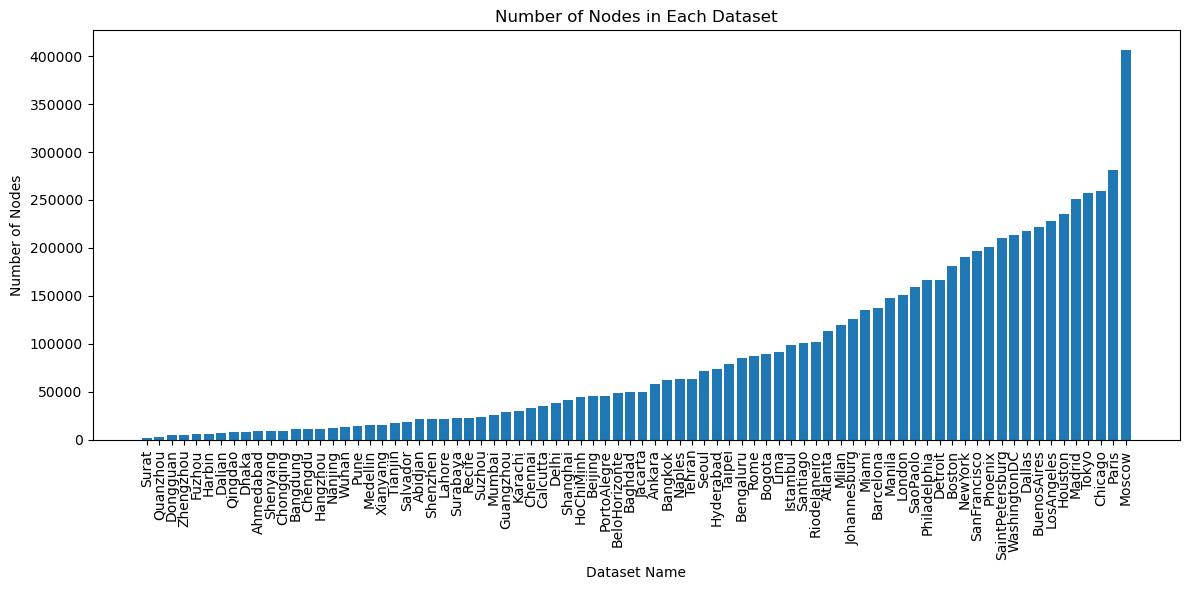

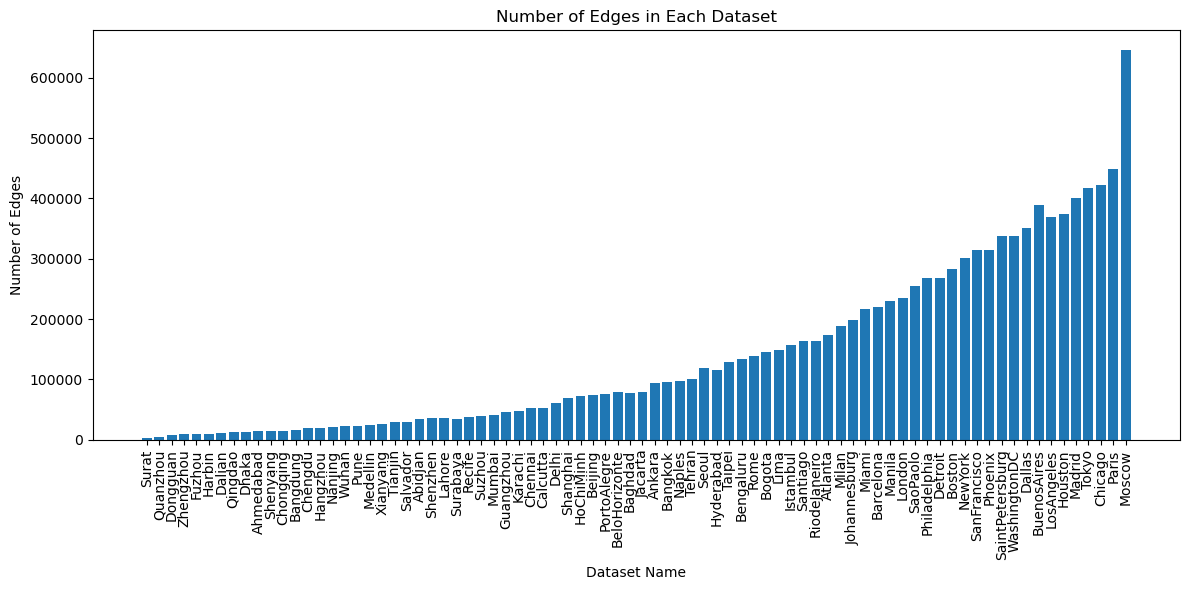

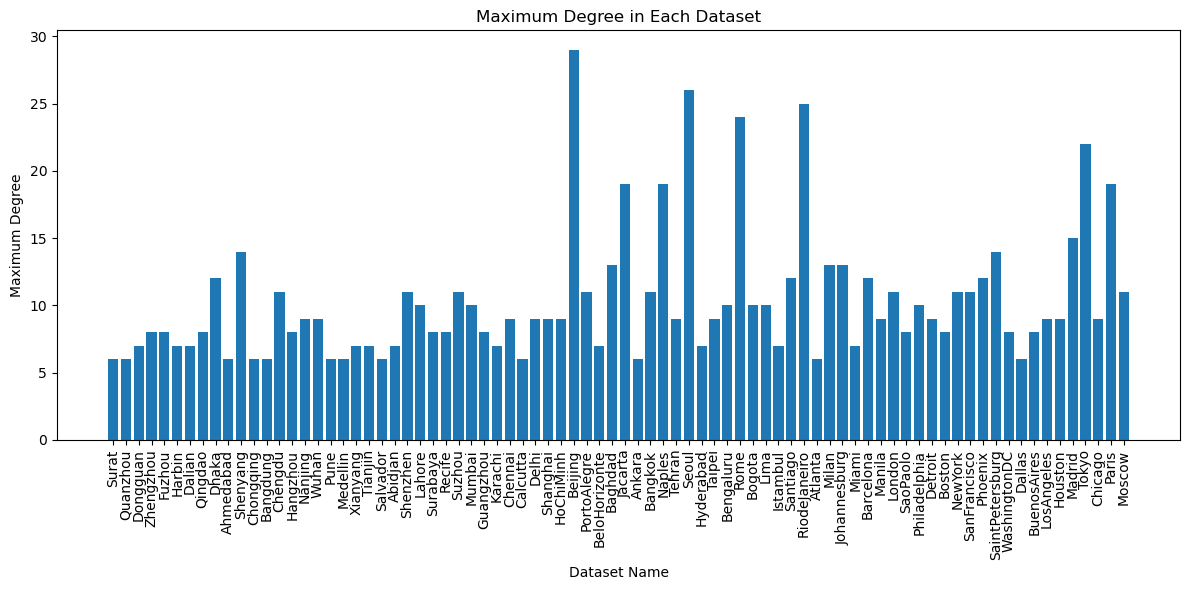

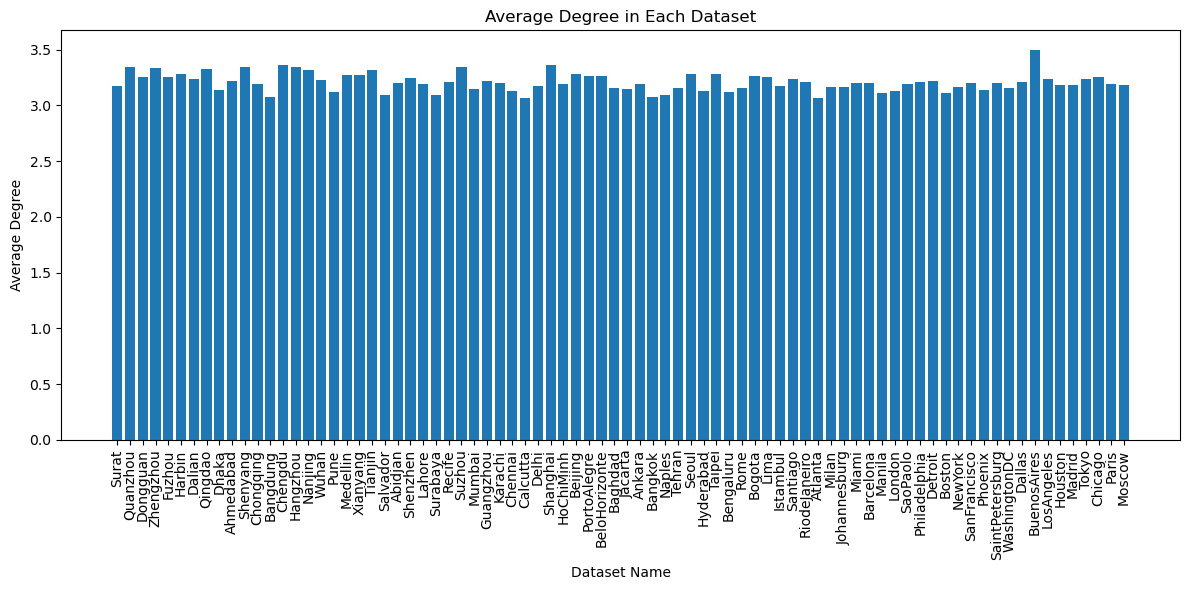

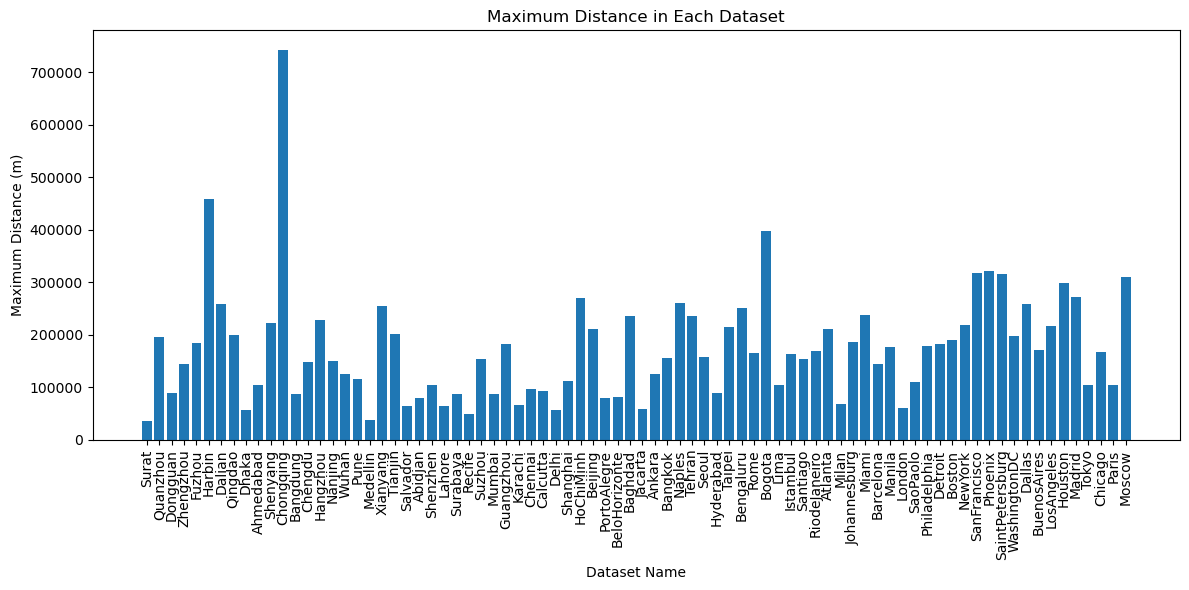

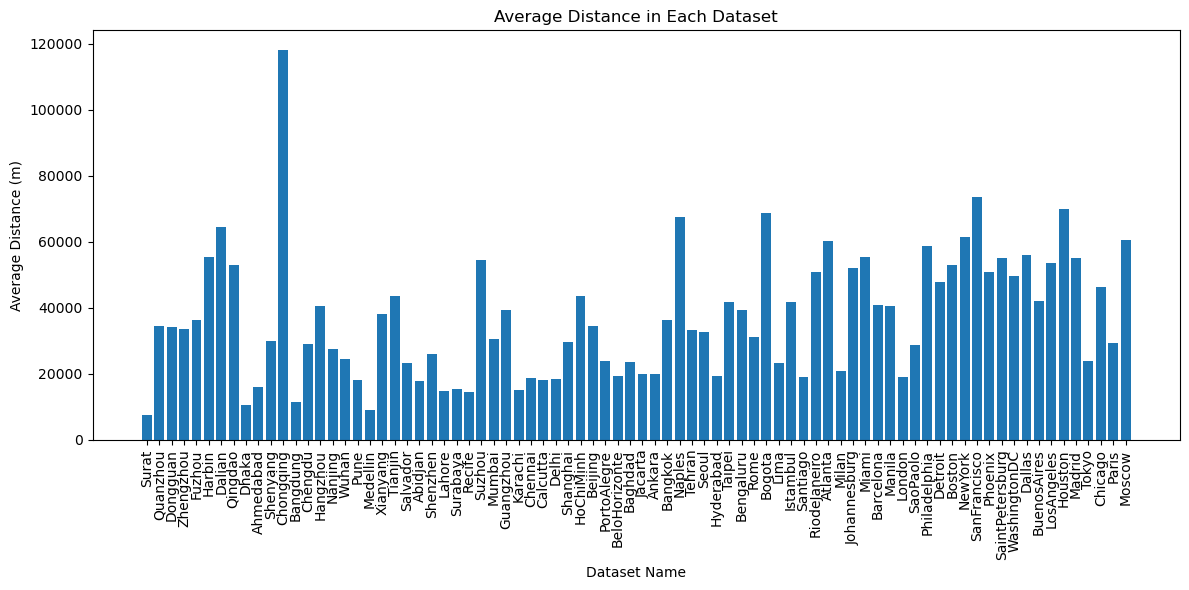

In [6]:
def plot_bar_chart(data, x_col, y_col, title, xlabel, ylabel):
    plt.figure(figsize=(12, 6))
    ax = plt.bar(data[x_col], data[y_col])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.tight_layout()
    # plt.show()
    return ax

plot_bar_chart(datasets, 'Dataset Name', 'Nodes', 'Number of Nodes in Each Dataset', 'Dataset Name', 'Number of Nodes')
plot_bar_chart(datasets, 'Dataset Name', 'Edges', 'Number of Edges in Each Dataset', 'Dataset Name', 'Number of Edges')
plot_bar_chart(datasets, 'Dataset Name', 'Max Degree', 'Maximum Degree in Each Dataset', 'Dataset Name', 'Maximum Degree')
plot_bar_chart(datasets, 'Dataset Name', 'Avg Degree', 'Average Degree in Each Dataset', 'Dataset Name', 'Average Degree')
plot_bar_chart(datasets, 'Dataset Name', 'Max Distance (m)', 'Maximum Distance in Each Dataset', 'Dataset Name', 'Maximum Distance (m)')
plot_bar_chart(datasets, 'Dataset Name', 'Avg Distance (m)', 'Average Distance in Each Dataset', 'Dataset Name', 'Average Distance (m)')

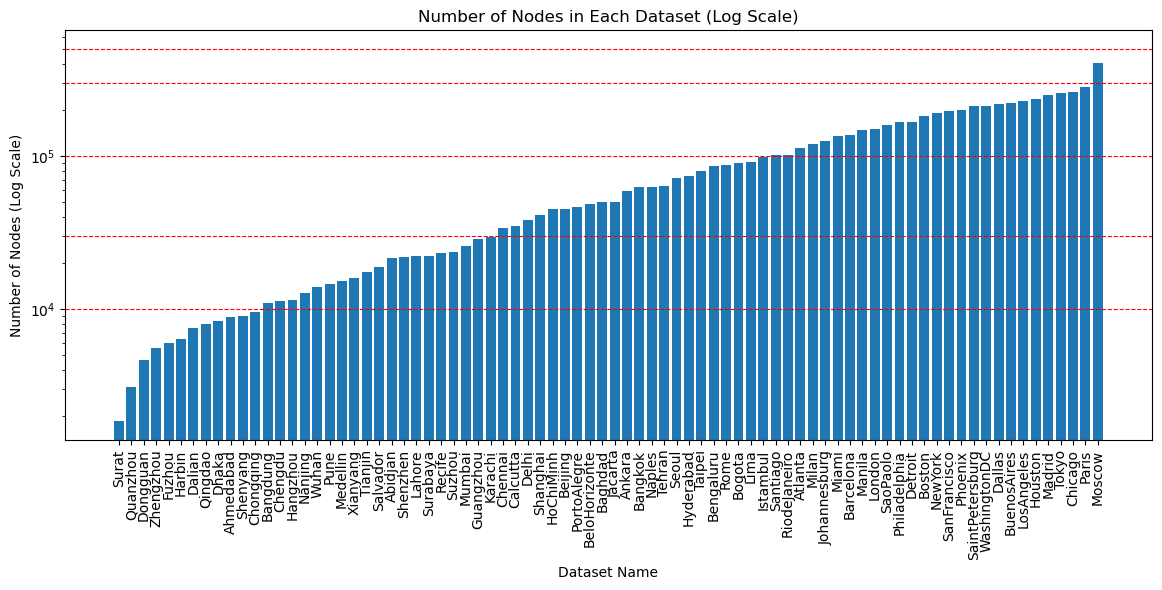

In [13]:
plot_bar_chart(datasets, 'Dataset Name', 'Nodes', 'Number of Nodes in Each Dataset', 'Dataset Name', 'Number of Nodes')
ax = plt.gca()
# for y in [10000, 25000, 50000, 75000, 100000, 150000, 200000, 400000]:
for y in [10000, 30000, 100000, 300000, 500000]:
    ax.axhline(y=y, color='r', linestyle='--', linewidth=0.8)
# show a log scale
plt.yscale('log')
plt.title('Number of Nodes in Each Dataset (Log Scale)')
plt.ylabel('Number of Nodes (Log Scale)')
plt.show()

In [ ]:
def categorize_size(nodes):
    if nodes < 5000:
        return 'Small'
    elif nodes < 50000:
        return 'Medium'
    elif nodes < 200000:
        return 'Large'
    else:
        return 'Extra Large'

datasets['Size Category'] = datasets['Nodes'].apply(categorize_size)
datasets[['Dataset Name', 'Nodes', 'Size Category']].head(20)

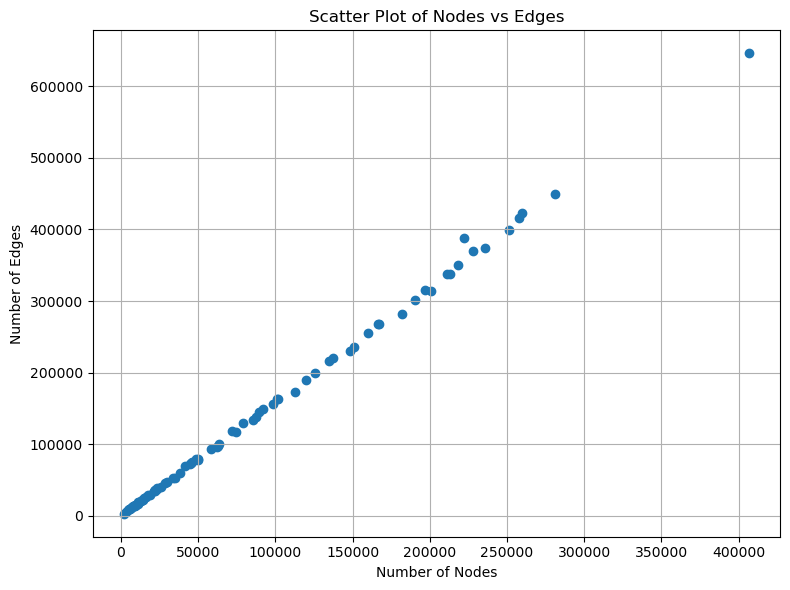

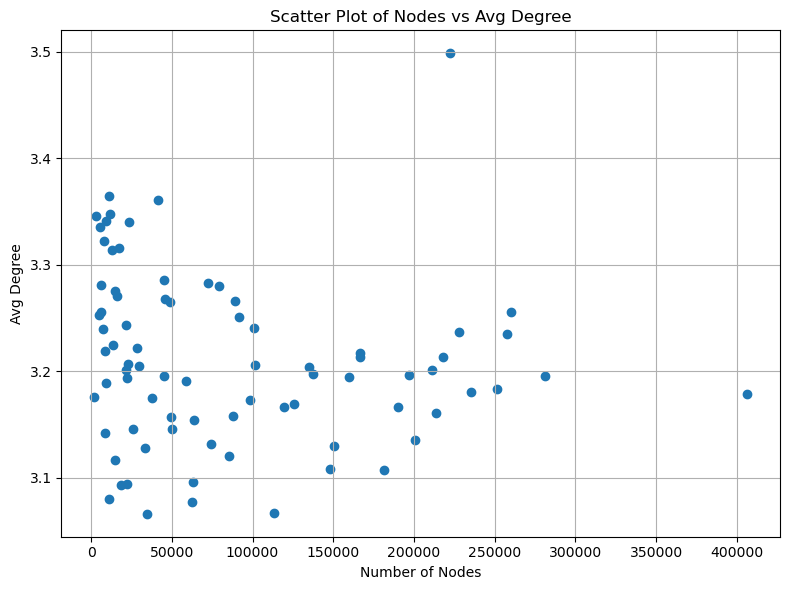

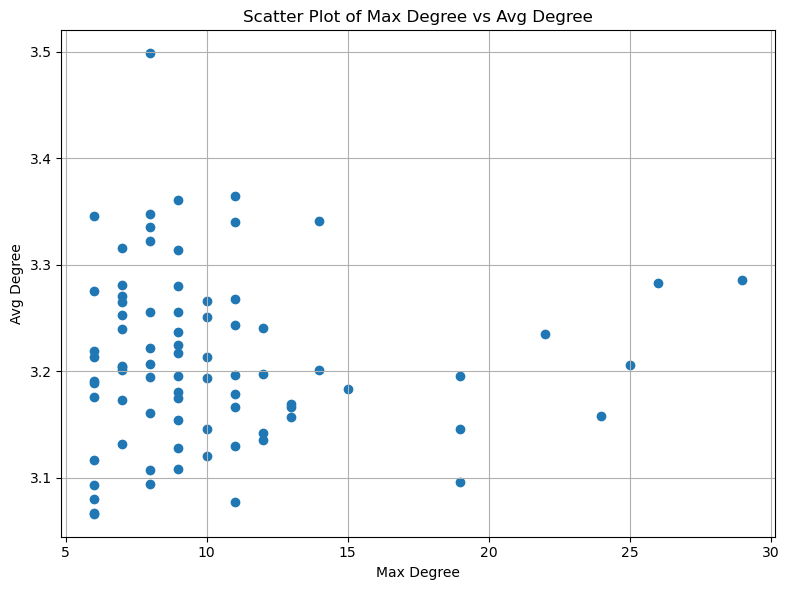

In [3]:
def plot_scatter_chart(data, x_col, y_col, title, xlabel, ylabel):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[x_col], data[y_col])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_scatter_chart(datasets, 'Nodes', 'Edges', 'Scatter Plot of Nodes vs Edges', 'Number of Nodes', 'Number of Edges')
plot_scatter_chart(datasets, 'Nodes', 'Avg Degree', 'Scatter Plot of Nodes vs Avg Degree', 'Number of Nodes', 'Avg Degree')
plot_scatter_chart(datasets, 'Max Degree', 'Avg Degree', 'Scatter Plot of Max Degree vs Avg Degree', 'Max Degree', 'Avg Degree')